In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [189]:
data = pd.read_csv('D:\Desktop\project large\client.csv')

In [190]:
data.head()

,Customer ID,Client Segment,Country,Product ID,Product Category,Purchasing Price,Order ID,Order Date,Delivery Date,Service Level,Quantity,Planned Sales Price,Profit
0,1-45998003,Corporate,United Arab Emirates,Product 7,Electronics,"36,081",O-80034597,7-Sep-20,10-Sep-20,3,7,"55,926","19,845"
1,1-97158370,Consumer,Morocco,Product 14,Furniture,"21,430",O-83709716,23-Sep-20,25-Sep-20,2,5,"28,502","7,072"
2,1-68585938,Consumer,Saudi Arabia,Product 12,Furniture,"44,494",O-59386851,24-Sep-20,25-Sep-20,1,3,"62,292","17,798"
3,1-67285988,Consumer,Algeria,Product 20,Computer & Laptop,"12,734",O-59886722,24-Apr-20,25-Apr-20,1,1,"16,554","3,820"
4,1-64719309,Consumer,Egypt,Product 14,Furniture,"21,430",O-93096473,17-Jan-20,20-Jan-20,3,1,"26,788","5,358"


In [191]:
data.shape

(10000, 13)

In [192]:
data.isnull().sum()

Customer ID            0
Client Segment         0
Country                0
Product ID             0
Product Category       0
Purchasing Price       0
Order ID               0
Order Date             0
Delivery Date          0
Service Level          0
Quantity               0
Planned Sales Price    0
Profit                 0
dtype: int64

###### How to deal with this objects

In [193]:
data.dtypes

Customer ID            object
Client Segment         object
Country                object
Product ID             object
Product Category       object
Purchasing Price       object
Order ID               object
Order Date             object
Delivery Date          object
Service Level           int64
Quantity                int64
Planned Sales Price    object
Profit                 object
dtype: object

In [194]:
data['Profit'].nunique()

119

In [195]:
data['Product Category'].value_counts()

Furniture            3553
Electronics          3410
Computer & Laptop    3037
Name: Product Category, dtype: int64

In [196]:
data['Country'].value_counts()

Morocco                 1737
United Arab Emirates    1665
Egypt                   1659
Iraq                    1654
Algeria                 1652
Saudi Arabia            1633
Name: Country, dtype: int64

In [197]:
data['Order Date'].value_counts().head(20)

2-Mar-20     51
1-Dec-20     50
1-Jul-20     48
1-May-20     42
1-Oct-20     42
1-Mar-20     40
27-Dec-20    40
17-Nov-20    40
28-Jul-20    39
2-Sep-20     39
14-Aug-20    39
1-Sep-20     38
7-Apr-20     38
12-Jan-20    38
28-Sep-20    37
8-Dec-20     37
11-Feb-20    37
17-Jun-20    36
8-Jan-20     36
15-Jan-20    35
Name: Order Date, dtype: int64

In [198]:
data['Product ID'].value_counts()

Product 19    537
Product 5     530
Product 13    523
Product 9     523
Product 3     516
Product 10    516
Product 14    511
Product 20    507
Product 8     506
Product 16    505
Product 15    504
Product 1     497
Product 17    496
Product 11    492
Product 18    488
Product 12    482
Product 2     476
Product 6     472
Product 4     462
Product 7     457
Name: Product ID, dtype: int64

In [199]:
data.groupby('Client Segment')['Country'].value_counts()

Client Segment  Country             
Consumer        Egypt                   1313
                Algeria                 1142
                Morocco                  953
                Iraq                     909
                Saudi Arabia             893
                United Arab Emirates     629
Corporate       United Arab Emirates    1036
                Morocco                  784
                Iraq                     745
                Saudi Arabia             740
                Algeria                  510
                Egypt                    346
Name: Country, dtype: int64

In [200]:
data.describe()

,Service Level,Quantity
count,10000.000000,10000.000000
mean,2.008400,8.324600
std,0.813754,7.274608
min,1.000000,1.000000
25%,1.000000,3.000000
50%,2.000000,5.000000
75%,3.000000,14.000000
max,3.000000,25.000000


In [201]:
newdata= data.drop(['Customer ID','Order ID'],axis=1)
newdata

,Client Segment,Country,Product ID,Product Category,Purchasing Price,Order Date,Delivery Date,Service Level,Quantity,Planned Sales Price,Profit
0,Corporate,United Arab Emirates,Product 7,Electronics,"36,081",7-Sep-20,10-Sep-20,3,7,"55,926","19,845"
1,Consumer,Morocco,Product 14,Furniture,"21,430",23-Sep-20,25-Sep-20,2,5,"28,502","7,072"
2,Consumer,Saudi Arabia,Product 12,Furniture,"44,494",24-Sep-20,25-Sep-20,1,3,"62,292","17,798"
3,Consumer,Algeria,Product 20,Computer & Laptop,"12,734",24-Apr-20,25-Apr-20,1,1,"16,554","3,820"
4,Consumer,Egypt,Product 14,Furniture,"21,430",17-Jan-20,20-Jan-20,3,1,"26,788","5,358"
...,...,...,...,...,...,...,...,...,...,...,...
9995,Consumer,Morocco,Product 11,Furniture,"44,772",14-Jun-20,15-Jun-20,1,2,"59,547","14,775"
9996,Consumer,Iraq,Product 4,Electronics,"19,232",21-Aug-20,23-Aug-20,2,4,"22,117","2,885"
9997,Consumer,Egypt,Product 2,Electronics,"13,144",19-Sep-20,21-Sep-20,2,2,"16,430","3,286"
9998,Corporate,United Arab Emirates,Product 2,Electronics,"13,144",1-Aug-20,3-Aug-20,2,18,"20,373","7,229"


In [202]:
newdata.describe(include=['O'])

,Client Segment,Country,Product ID,Product Category,Purchasing Price,Order Date,Delivery Date,Planned Sales Price,Profit
count,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,2,6,20,3,20,366,368,119,119
top,Consumer,Morocco,Product 19,Furniture,"15,954",2-Mar-20,5-Sep-20,"55,618","11,124"
freq,5839,1737,537,3553,537,51,42,171,171


In [203]:
newdata['Client Segment'].value_counts()

Consumer     5839
Corporate    4161
Name: Client Segment, dtype: int64

In [204]:
newdata[['Purchasing Price','Planned Sales Price','Profit']]

,Purchasing Price,Planned Sales Price,Profit
0,"36,081","55,926","19,845"
1,"21,430","28,502","7,072"
2,"44,494","62,292","17,798"
3,"12,734","16,554","3,820"
4,"21,430","26,788","5,358"
...,...,...,...
9995,"44,772","59,547","14,775"
9996,"19,232","22,117","2,885"
9997,"13,144","16,430","3,286"
9998,"13,144","20,373","7,229"


###### Convert comma to decimal point and convert numbers to float

In [205]:
newdata['Purchasing Price'] = newdata['Purchasing Price'].apply(lambda x: x.replace(',', '.')).astype('float')

In [206]:
newdata['Profit'] = newdata['Profit'].apply(lambda x: x.replace(',', '.')).astype('float')

In [207]:
newdata['Planned Sales Price'] = newdata['Planned Sales Price'].apply(lambda x: x.replace(',', '.')).astype('float')

In [208]:
newdata[['Purchasing Price','Planned Sales Price','Profit']]

,Purchasing Price,Planned Sales Price,Profit
0,36.081,55.926,19.845
1,21.430,28.502,7.072
2,44.494,62.292,17.798
3,12.734,16.554,3.820
4,21.430,26.788,5.358
...,...,...,...
9995,44.772,59.547,14.775
9996,19.232,22.117,2.885
9997,13.144,16.430,3.286
9998,13.144,20.373,7.229


### check 3 columns

In [209]:
newdata[['Purchasing Price','Planned Sales Price','Profit']].dtypes

Purchasing Price       float64
Planned Sales Price    float64
Profit                 float64
dtype: object

In [210]:
newdata.dtypes

Client Segment          object
Country                 object
Product ID              object
Product Category        object
Purchasing Price       float64
Order Date              object
Delivery Date           object
Service Level            int64
Quantity                 int64
Planned Sales Price    float64
Profit                 float64
dtype: object

In [211]:
newdata.head()

,Client Segment,Country,Product ID,Product Category,Purchasing Price,Order Date,Delivery Date,Service Level,Quantity,Planned Sales Price,Profit
0,Corporate,United Arab Emirates,Product 7,Electronics,36.081,7-Sep-20,10-Sep-20,3,7,55.926,19.845
1,Consumer,Morocco,Product 14,Furniture,21.430,23-Sep-20,25-Sep-20,2,5,28.502,7.072
2,Consumer,Saudi Arabia,Product 12,Furniture,44.494,24-Sep-20,25-Sep-20,1,3,62.292,17.798
3,Consumer,Algeria,Product 20,Computer & Laptop,12.734,24-Apr-20,25-Apr-20,1,1,16.554,3.820
4,Consumer,Egypt,Product 14,Furniture,21.430,17-Jan-20,20-Jan-20,3,1,26.788,5.358


### Convert the product category into int

In [212]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(newdata['Product Category'])
le.classes_
newdata['Product Category'] = le.transform(newdata['Product Category'])

In [213]:
newdata['Product Category'].head(7)

0    1
1    2
2    2
3    0
4    2
5    2
6    2
Name: Product Category, dtype: int32

In [214]:
newdata['Product Category'].dtypes

dtype('int32')

## Convert the Client Segment to two columns and uint8 >>>>>>>>>>>>

In [215]:
newdata[['Consumer','Corporate']] = pd.get_dummies(newdata['Client Segment'],columns=['Client Segment'])
newdata[['Consumer','Corporate']].head()

,Consumer,Corporate
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [216]:
newdata.head()

,Client Segment,Country,Product ID,Product Category,Purchasing Price,Order Date,Delivery Date,Service Level,Quantity,Planned Sales Price,Profit,Consumer,Corporate
0,Corporate,United Arab Emirates,Product 7,1,36.081,7-Sep-20,10-Sep-20,3,7,55.926,19.845,0,1
1,Consumer,Morocco,Product 14,2,21.430,23-Sep-20,25-Sep-20,2,5,28.502,7.072,1,0
2,Consumer,Saudi Arabia,Product 12,2,44.494,24-Sep-20,25-Sep-20,1,3,62.292,17.798,1,0
3,Consumer,Algeria,Product 20,0,12.734,24-Apr-20,25-Apr-20,1,1,16.554,3.820,1,0
4,Consumer,Egypt,Product 14,2,21.430,17-Jan-20,20-Jan-20,3,1,26.788,5.358,1,0


In [217]:
newdata.dtypes

Client Segment          object
Country                 object
Product ID              object
Product Category         int32
Purchasing Price       float64
Order Date              object
Delivery Date           object
Service Level            int64
Quantity                 int64
Planned Sales Price    float64
Profit                 float64
Consumer                 uint8
Corporate                uint8
dtype: object

#### Clarify the extent to which data are related to each other by correlation coefficient and heatmap

In [218]:
c=newdata.corr()
c

,Product Category,Purchasing Price,Service Level,Quantity,Planned Sales Price,Profit,Consumer,Corporate
Product Category,1.000000,0.741838,0.019821,0.001332,0.723470,0.547838,0.009192,-0.009192
Purchasing Price,0.741838,1.000000,0.020747,0.009450,0.975930,0.740616,-0.000728,0.000728
Service Level,0.019821,0.020747,1.000000,0.012210,0.020004,0.014615,-0.005996,0.005996
Quantity,0.001332,0.009450,0.012210,1.000000,0.009017,0.006366,-0.663450,0.663450
Planned Sales Price,0.723470,0.975930,0.020004,0.009017,1.000000,0.869326,-0.032144,0.032144
Profit,0.547838,0.740616,0.014615,0.006366,0.869326,1.000000,-0.097388,0.097388
Consumer,0.009192,-0.000728,-0.005996,-0.663450,-0.032144,-0.097388,1.000000,-1.000000
Corporate,-0.009192,0.000728,0.005996,0.663450,0.032144,0.097388,-1.000000,1.000000


<AxesSubplot:>

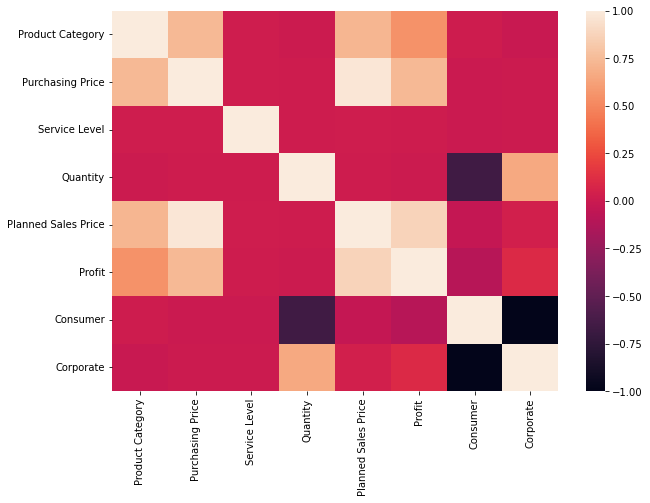

In [219]:
plt.figure(figsize=(10,7))
c=newdata.corr()
sns.heatmap(c)

## >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [220]:
newdata = newdata.drop(['Service Level','Quantity','Delivery Date','Client Segment'],axis=1)

In [221]:
newdata.head()


,Country,Product ID,Product Category,Purchasing Price,Order Date,Planned Sales Price,Profit,Consumer,Corporate
0,United Arab Emirates,Product 7,1,36.081,7-Sep-20,55.926,19.845,0,1
1,Morocco,Product 14,2,21.430,23-Sep-20,28.502,7.072,1,0
2,Saudi Arabia,Product 12,2,44.494,24-Sep-20,62.292,17.798,1,0
3,Algeria,Product 20,0,12.734,24-Apr-20,16.554,3.820,1,0
4,Egypt,Product 14,2,21.430,17-Jan-20,26.788,5.358,1,0


## Convert the Country to sex columns and uint8 >>>>>>>>>>>>

In [222]:
c=pd.get_dummies(newdata['Country'],columns=['Country'])
c

,Algeria,Egypt,Iraq,Morocco,Saudi Arabia,United Arab Emirates
0,0,0,0,0,0,1
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
9995,0,0,0,1,0,0
9996,0,0,1,0,0,0
9997,0,1,0,0,0,0
9998,0,0,0,0,0,1


In [224]:
newdata.head()

,Country,Product ID,Product Category,Purchasing Price,Order Date,Planned Sales Price,Profit,Consumer,Corporate
0,United Arab Emirates,Product 7,1,36.081,7-Sep-20,55.926,19.845,0,1
1,Morocco,Product 14,2,21.430,23-Sep-20,28.502,7.072,1,0
2,Saudi Arabia,Product 12,2,44.494,24-Sep-20,62.292,17.798,1,0
3,Algeria,Product 20,0,12.734,24-Apr-20,16.554,3.820,1,0
4,Egypt,Product 14,2,21.430,17-Jan-20,26.788,5.358,1,0


In [225]:
c.value_counts()

Algeria  Egypt  Iraq  Morocco  Saudi Arabia  United Arab Emirates
0        0      0     1        0             0                       1737
                      0        0             1                       1665
         1      0     0        0             0                       1659
         0      1     0        0             0                       1654
1        0      0     0        0             0                       1652
0        0      0     0        1             0                       1633
dtype: int64

## convert Product ID to int32 and check correlation

In [229]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(newdata['Product ID'])
le.classes_
newdata['Product ID'] = le.transform(newdata['Product ID'])
newdata['Product ID'] 

0       17
1        5
2        3
3       12
4        5
        ..
9995     2
9996    14
9997    11
9998    11
9999    11
Name: Product ID, Length: 10000, dtype: int64

In [230]:
newdata['Product ID'].dtypes

dtype('int64')

In [231]:
newdata.head()

,Country,Product ID,Product Category,Purchasing Price,Order Date,Planned Sales Price,Profit,Consumer,Corporate
0,United Arab Emirates,17,1,36.081,7-Sep-20,55.926,19.845,0,1
1,Morocco,5,2,21.430,23-Sep-20,28.502,7.072,1,0
2,Saudi Arabia,3,2,44.494,24-Sep-20,62.292,17.798,1,0
3,Algeria,12,0,12.734,24-Apr-20,16.554,3.820,1,0
4,Egypt,5,2,21.430,17-Jan-20,26.788,5.358,1,0


In [234]:
newdata.corr()

,Product ID,Product Category,Purchasing Price,Planned Sales Price,Profit,Consumer,Corporate
Product ID,1.000000,-0.098939,0.085867,0.082734,0.060309,0.002012,-0.002012
Product Category,-0.098939,1.000000,0.741838,0.723470,0.547838,0.009192,-0.009192
Purchasing Price,0.085867,0.741838,1.000000,0.975930,0.740616,-0.000728,0.000728
Planned Sales Price,0.082734,0.723470,0.975930,1.000000,0.869326,-0.032144,0.032144
Profit,0.060309,0.547838,0.740616,0.869326,1.000000,-0.097388,0.097388
Consumer,0.002012,0.009192,-0.000728,-0.032144,-0.097388,1.000000,-1.000000
Corporate,-0.002012,-0.009192,0.000728,0.032144,0.097388,-1.000000,1.000000


<AxesSubplot:>

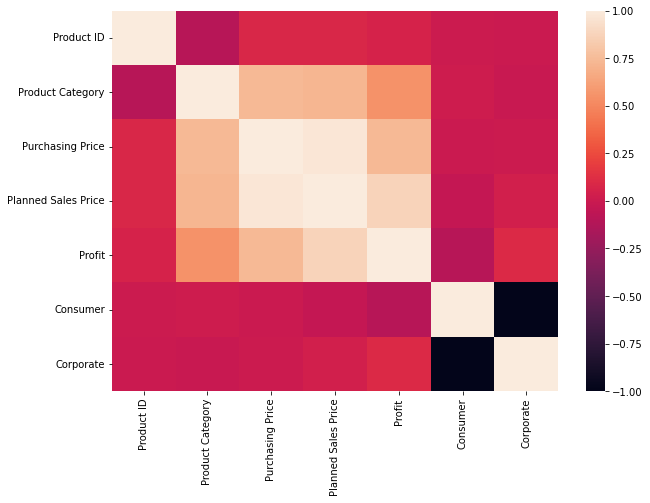

In [235]:
b=newdata.corr()
plt.figure(figsize=(10,7))
sns.heatmap(b)

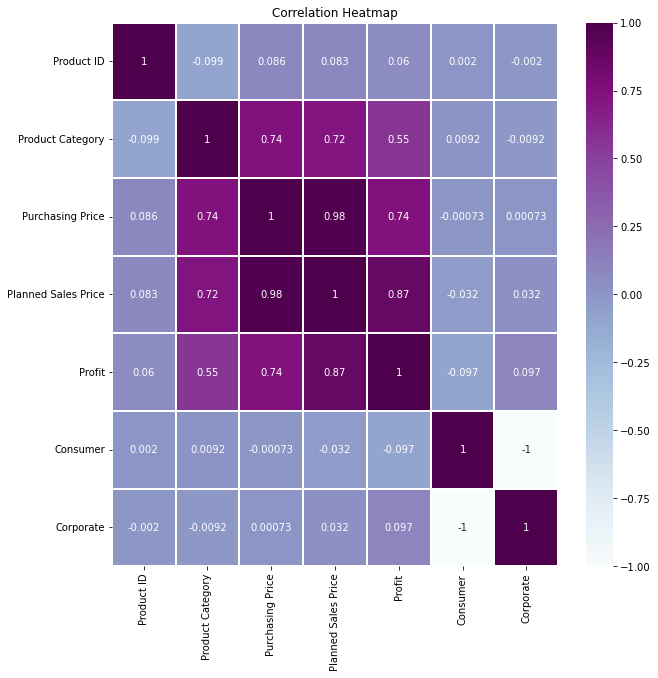

In [236]:
plt.figure(figsize = (10,10))
sns.heatmap(newdata.corr(), annot=True, cmap="BuPu", linewidth = 0.01)
plt.title("Correlation Heatmap")
plt.show()

## How to find a specific month in case the data was an object using regex

In [237]:
newdata[newdata['Order Date'].str.contains('.+Sep.+')]['Order Date'].value_counts().sum()

850

In [238]:
newdata[newdata['Order Date'].str.contains('.+Mar.+')]['Order Date'].value_counts().sum()

816

In [239]:
newdata[newdata['Order Date'].str.contains('.+Dec.+')]['Order Date'].value_counts().sum()

883

In [240]:
newdata[newdata['Order Date'].str.contains('.+Oct.+')]['Order Date'].value_counts().sum()

810

In [241]:
newdata[newdata['Order Date'].str.contains('.+Nov.+')]['Order Date'].value_counts().sum()

856

In [242]:
newdata[newdata['Order Date'].str.contains('.+Aug.+')]['Order Date'].value_counts().sum()

832

In [243]:
newdata[newdata['Order Date'].str.contains('.+Jul.+')]['Order Date'].value_counts().sum()

846

In [244]:
newdata[newdata['Order Date'].str.contains('.+Feb.+')]['Order Date'].value_counts().sum()

817

In [245]:
newdata[newdata['Order Date'].str.contains('.+Apr.+')]['Order Date'].value_counts().sum()

816

In [246]:
newdata[newdata['Order Date'].str.contains('.+Jan.+')]['Order Date'].value_counts().sum()

852

In [247]:
newdata[newdata['Order Date'].str.contains('.+Jun.+')]['Order Date'].value_counts().sum()

784

## convert Order Date to datetime

In [248]:
newdata['Order Date']=pd.to_datetime(newdata['Order Date'])

newdata['Order Date']

0      2020-09-07
1      2020-09-23
2      2020-09-24
3      2020-04-24
4      2020-01-17
          ...    
9995   2020-06-14
9996   2020-08-21
9997   2020-09-19
9998   2020-08-01
9999   2020-02-14
Name: Order Date, Length: 10000, dtype: datetime64[ns]

In [249]:
newdata.dtypes

Country                        object
Product ID                      int64
Product Category                int32
Purchasing Price              float64
Order Date             datetime64[ns]
Planned Sales Price           float64
Profit                        float64
Consumer                        uint8
Corporate                       uint8
dtype: object

## convert Country to int

In [251]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(newdata['Country'])
le.classes_
newdata['Country'] = le.transform(newdata['Country'])
newdata['Country']

0       5
1       3
2       4
3       0
4       1
       ..
9995    3
9996    2
9997    1
9998    5
9999    1
Name: Country, Length: 10000, dtype: int32

In [252]:
newdata.head()

,Country,Product ID,Product Category,Purchasing Price,Order Date,Planned Sales Price,Profit,Consumer,Corporate
0,5,17,1,36.081,2020-09-07,55.926,19.845,0,1
1,3,5,2,21.430,2020-09-23,28.502,7.072,1,0
2,4,3,2,44.494,2020-09-24,62.292,17.798,1,0
3,0,12,0,12.734,2020-04-24,16.554,3.820,1,0
4,1,5,2,21.430,2020-01-17,26.788,5.358,1,0


## Finish converting all columns to  numeric , float  and float >>>>>>>>>>>>>> 

In [254]:
newdata.dtypes

Country                         int32
Product ID                      int64
Product Category                int32
Purchasing Price              float64
Order Date             datetime64[ns]
Planned Sales Price           float64
Profit                        float64
Consumer                        uint8
Corporate                       uint8
dtype: object

In [255]:
newdata.corr()

,Country,Product ID,Product Category,Purchasing Price,Planned Sales Price,Profit,Consumer,Corporate
Country,1.000000,0.006648,-0.018546,-0.006632,0.138167,0.440731,-0.227711,0.227711
Product ID,0.006648,1.000000,-0.098939,0.085867,0.082734,0.060309,0.002012,-0.002012
Product Category,-0.018546,-0.098939,1.000000,0.741838,0.723470,0.547838,0.009192,-0.009192
Purchasing Price,-0.006632,0.085867,0.741838,1.000000,0.975930,0.740616,-0.000728,0.000728
Planned Sales Price,0.138167,0.082734,0.723470,0.975930,1.000000,0.869326,-0.032144,0.032144
Profit,0.440731,0.060309,0.547838,0.740616,0.869326,1.000000,-0.097388,0.097388
Consumer,-0.227711,0.002012,0.009192,-0.000728,-0.032144,-0.097388,1.000000,-1.000000
Corporate,0.227711,-0.002012,-0.009192,0.000728,0.032144,0.097388,-1.000000,1.000000


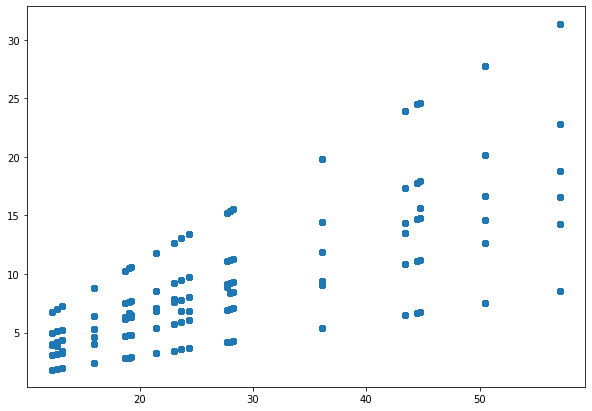

In [257]:
plt.figure(figsize=(10,7))
plt.scatter(newdata['Purchasing Price'],newdata['Profit'])

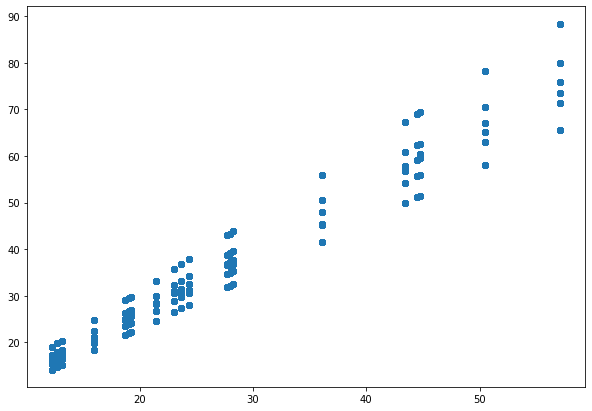

In [259]:
plt.figure(figsize=(10,7))
plt.scatter(newdata['Purchasing Price'],newdata['Planned Sales Price'])

In [260]:
newdata.head()

,Country,Product ID,Product Category,Purchasing Price,Order Date,Planned Sales Price,Profit,Consumer,Corporate
0,5,17,1,36.081,2020-09-07,55.926,19.845,0,1
1,3,5,2,21.430,2020-09-23,28.502,7.072,1,0
2,4,3,2,44.494,2020-09-24,62.292,17.798,1,0
3,0,12,0,12.734,2020-04-24,16.554,3.820,1,0
4,1,5,2,21.430,2020-01-17,26.788,5.358,1,0


## How to separate months and days  from order date >>>>>>>>>

In [264]:
newdata['month']=newdata['Order Date'].apply(lambda x : x.month)
newdata['month']

0       9
1       9
2       9
3       4
4       1
       ..
9995    6
9996    8
9997    9
9998    8
9999    2
Name: month, Length: 10000, dtype: int64

In [263]:
newdata.head()

,Country,Product ID,Product Category,Purchasing Price,Order Date,Planned Sales Price,Profit,Consumer,Corporate,month
0,5,17,1,36.081,2020-09-07,55.926,19.845,0,1,9
1,3,5,2,21.430,2020-09-23,28.502,7.072,1,0,9
2,4,3,2,44.494,2020-09-24,62.292,17.798,1,0,9
3,0,12,0,12.734,2020-04-24,16.554,3.820,1,0,4
4,1,5,2,21.430,2020-01-17,26.788,5.358,1,0,1


In [107]:
newdata['Order Date'].apply(lambda x : x.year).nunique()

1

In [265]:
newdata['Order Date'].apply(lambda x : x.day).value_counts()

1     417
2     376
3     361
26    357
8     355
27    350
14    349
5     347
17    340
13    337
12    334
18    329
19    328
22    321
10    320
9     319
29    315
6     314
16    313
24    312
28    311
7     309
21    309
4     303
25    300
20    299
15    299
11    299
30    297
23    284
31    196
Name: Order Date, dtype: int64

In [269]:
newdata['day']= newdata['Order Date'].apply(lambda x : x.day)
newdata['day']

0        7
1       23
2       24
3       24
4       17
        ..
9995    14
9996    21
9997    19
9998     1
9999    14
Name: day, Length: 10000, dtype: int64

In [268]:
newdata.head()

,Country,Product ID,Product Category,Purchasing Price,Order Date,Planned Sales Price,Profit,Consumer,Corporate,month,day
0,5,17,1,36.081,2020-09-07,55.926,19.845,0,1,9,7
1,3,5,2,21.430,2020-09-23,28.502,7.072,1,0,9,23
2,4,3,2,44.494,2020-09-24,62.292,17.798,1,0,9,24
3,0,12,0,12.734,2020-04-24,16.554,3.820,1,0,4,24
4,1,5,2,21.430,2020-01-17,26.788,5.358,1,0,1,17


In [270]:
newdata['Order Date'].apply(lambda x : x.month).unique()

array([ 9,  4,  1,  2,  7,  3, 12, 10,  6, 11,  5,  8], dtype=int64)

In [271]:
newdata['Order Date'].apply(lambda x : x.day).unique()

array([ 7, 23, 24, 17, 10,  5,  1,  2, 18, 19, 11, 15, 25, 16, 28,  8, 21,
       12, 30, 29,  6, 20,  3,  9, 26, 14, 13, 31, 27, 22,  4],
      dtype=int64)

In [112]:
newdata['Order Date'].apply(lambda x : x.day).nunique()

31

In [113]:
newdata['Order Date'].apply(lambda x : x.month).value_counts().sort_values(ascending = False)

12    883
11    856
1     852
9     850
7     846
5     838
8     832
2     817
4     816
3     816
10    810
6     784
Name: Order Date, dtype: int64

In [272]:
sales=newdata.groupby('month')['Profit'].sum().sort_values(ascending=False)
sales

month
12    8688.162
11    8134.209
9     8076.558
1     8020.690
5     7859.590
7     7734.830
3     7599.184
8     7561.941
4     7521.784
2     7455.391
10    7450.416
6     7306.168
Name: Profit, dtype: float64

In [273]:
sales.index

Int64Index([12, 11, 9, 1, 5, 7, 3, 8, 4, 2, 10, 6], dtype='int64', name='month')

In [274]:
sales.values

array([8688.162, 8134.209, 8076.558, 8020.69 , 7859.59 , 7734.83 ,
       7599.184, 7561.941, 7521.784, 7455.391, 7450.416, 7306.168])

<BarContainer object of 12 artists>

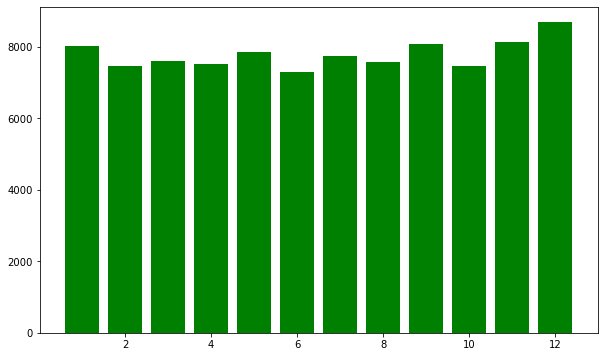

In [275]:
plt.figure(figsize = (10,6))
plt.bar(sales.index,sales.values,color='green')


In [276]:
sales.round()

month
12    8688.0
11    8134.0
9     8077.0
1     8021.0
5     7860.0
7     7735.0
3     7599.0
8     7562.0
4     7522.0
2     7455.0
10    7450.0
6     7306.0
Name: Profit, dtype: float64

<BarContainer object of 12 artists>

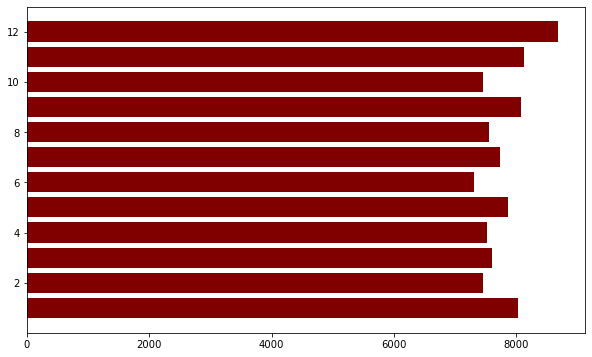

In [277]:
plt.figure(figsize = (10,6))
plt.barh(sales.index,sales.values,color='maroon')

In [280]:
country = newdata.groupby('Country')['Profit'].sum().sort_values(ascending=False)
country

Country
5    25897.285
4    18481.173
3    16040.142
0    14293.957
1    11721.800
2     6974.566
Name: Profit, dtype: float64

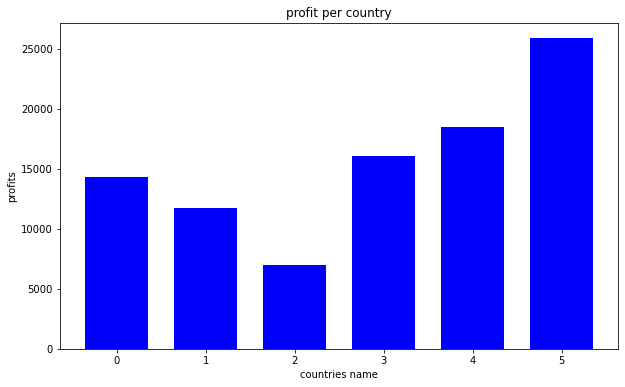

In [279]:
plt.figure(figsize = (10,6))
plt.bar(country.index,country.values,color='blue',width = 0.7)
plt.xlabel("countries name")
plt.ylabel("profits")
plt.title("profit per country")
plt.show()

In [282]:
newdata.groupby('Consumer')['Profit'].sum().sort_values(ascending=False)

Consumer
1    51767.973
0    41640.950
Name: Profit, dtype: float64

<Figure size 720x720 with 0 Axes>

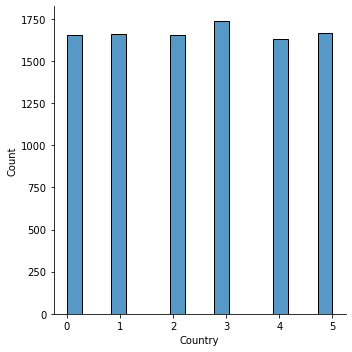

In [283]:
sns.displot(newdata['Country'])

<Figure size 1440x1440 with 0 Axes>

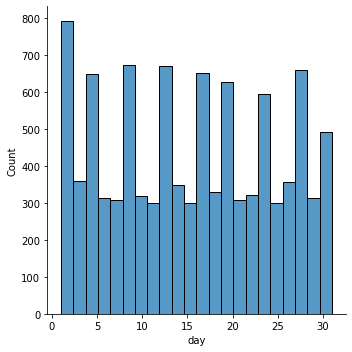

In [289]:
sns.displot(newdata['day'])

In [291]:
newdata['Product ID'].duplicated(keep=False)

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Name: Product ID, Length: 10000, dtype: bool

In [298]:
newdata.nlargest(5,'Profit')[['Profit','Product Category','month']]

,Profit,Product Category,month
95,31.381,2,8
540,31.381,2,6
673,31.381,2,2
784,31.381,2,9
785,31.381,2,12


In [299]:
newdata.nsmallest(5,'Profit')[['Profit','Product Category','month']]

,Profit,Product Category,month
699,1.846,0,1
1050,1.846,0,3
1297,1.846,0,9
1437,1.846,0,7
1544,1.846,0,3


In [300]:
newdata.query('Profit >1.846 ')[['Profit']].head().sort_values(by='Profit', ascending=False)

,Profit
0,19.845
2,17.798
1,7.072
4,5.358
3,3.820


In [301]:
newdata.query('Profit >1.846 ')[['Profit']].head()

,Profit
0,19.845
1,7.072
2,17.798
3,3.820
4,5.358


## >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [292]:
data.head()

,Customer ID,Client Segment,Country,Product ID,Product Category,Purchasing Price,Order ID,Order Date,Delivery Date,Service Level,Quantity,Planned Sales Price,Profit
0,1-45998003,Corporate,United Arab Emirates,Product 7,Electronics,"36,081",O-80034597,7-Sep-20,10-Sep-20,3,7,"55,926","19,845"
1,1-97158370,Consumer,Morocco,Product 14,Furniture,"21,430",O-83709716,23-Sep-20,25-Sep-20,2,5,"28,502","7,072"
2,1-68585938,Consumer,Saudi Arabia,Product 12,Furniture,"44,494",O-59386851,24-Sep-20,25-Sep-20,1,3,"62,292","17,798"
3,1-67285988,Consumer,Algeria,Product 20,Computer & Laptop,"12,734",O-59886722,24-Apr-20,25-Apr-20,1,1,"16,554","3,820"
4,1-64719309,Consumer,Egypt,Product 14,Furniture,"21,430",O-93096473,17-Jan-20,20-Jan-20,3,1,"26,788","5,358"


In [293]:
data[~data['Product Category'].str.startswith('E')][['Product Category','Quantity','Profit']]

,Product Category,Quantity,Profit
1,Furniture,5,"7,072"
2,Furniture,3,"17,798"
3,Computer & Laptop,1,"3,820"
4,Furniture,1,"5,358"
5,Furniture,5,"23,883"
...,...,...,...
9987,Computer & Laptop,25,"3,184"
9991,Computer & Laptop,24,"3,939"
9993,Furniture,2,"16,547"
9994,Furniture,22,"17,909"


In [294]:
data[data['Product Category'].str.endswith('s')][['Product Category','Quantity','Profit']]

,Product Category,Quantity,Profit
0,Electronics,7,"19,845"
10,Electronics,1,"6,990"
12,Electronics,4,"15,550"
13,Electronics,3,"11,309"
20,Electronics,8,"3,659"
...,...,...,...
9992,Electronics,9,"11,309"
9996,Electronics,4,"2,885"
9997,Electronics,2,"3,286"
9998,Electronics,18,"7,229"


In [295]:
data[data['Product Category'].str.contains('&')][['Product Category','Quantity','Profit']]

,Product Category,Quantity,Profit
3,Computer & Laptop,1,"3,820"
15,Computer & Laptop,4,"4,202"
24,Computer & Laptop,14,"3,184"
33,Computer & Laptop,1,"6,296"
38,Computer & Laptop,25,"10,291"
...,...,...,...
9982,Computer & Laptop,4,"6,175"
9983,Computer & Laptop,5,"6,296"
9985,Computer & Laptop,1,"7,632"
9987,Computer & Laptop,25,"3,184"


In [296]:
data[data['Product Category'].str.contains('&') & data['Country'].str.endswith('bia')][['Product Category','Country','Profit']]

,Product Category,Country,Profit
58,Computer & Laptop,Saudi Arabia,"7,632"
152,Computer & Laptop,Saudi Arabia,"5,094"
167,Computer & Laptop,Saudi Arabia,"6,382"
170,Computer & Laptop,Saudi Arabia,"6,382"
197,Computer & Laptop,Saudi Arabia,"6,382"
...,...,...,...
9888,Computer & Laptop,Saudi Arabia,"9,228"
9891,Computer & Laptop,Saudi Arabia,"5,094"
9914,Computer & Laptop,Saudi Arabia,"6,382"
9952,Computer & Laptop,Saudi Arabia,"4,923"


In [297]:
data[~data['Product Category'].str.contains('&') & ~data['Country'].str.endswith('bia')][['Product Category','Country','Profit']]

,Product Category,Country,Profit
0,Electronics,United Arab Emirates,"19,845"
1,Furniture,Morocco,"7,072"
4,Furniture,Egypt,"5,358"
5,Furniture,United Arab Emirates,"23,883"
7,Furniture,United Arab Emirates,"23,883"
...,...,...,...
9995,Furniture,Morocco,"14,775"
9996,Electronics,Iraq,"2,885"
9997,Electronics,Egypt,"3,286"
9998,Electronics,United Arab Emirates,"7,229"
